In [1]:
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [2]:
# Take array, return array
def coarsen(ci,we_int,sn_int):
    ci = ci[:,:,:-1,:-1]
    (times, ens, south_north, west_east) = ci.shape
    sn_coarse = int(south_north/4)
    we_coarse = int(west_east/4)
    ci_crs = np.zeros((times,ens,sn_coarse,we_coarse))
    for t in range(times):
        for e in range(ens):
            frame = ci[t,e,:,:]
            for sn in range(sn_coarse):
                for we in range(we_coarse):
                    ci_crs[t,e,sn,we] = np.average(frame[4*sn:4*sn+4,
                                                           4*we:4*we+4])
    return ci_crs

In [4]:
res_files = glob('2014*Z.nc')
we_int = np.arange(240.0,280.0,dtype=np.float32)
sn_int = np.arange(32.0,88.0,dtype=np.float32)
for res in res_files:
    print(res)
    if(('0415' in res) or ('0426' in res) or ('0529' in res)):
        print("continue")
        continue
    res_ds = xr.open_dataset(res)
    res_ci = res_ds.data_vars['ci']
    res_ds.close()
    ci_crs = coarsen(res_ci.values,we_int,sn_int)
    df_crs = xr.DataArray(ci_crs,
                    coords=[res_ci.time.values,
                            np.array(res_ci.ensemble_number.values,dtype=int),
                            sn_int,we_int],
                    dims=['time','ensemble_number','south_north',
                           'west_east'],
                    name='ci')
    
    name = res[:-3]+'_crs.nc'
    df_crs.to_netcdf(name)

20140402_1630Z.nc
20140402_1645Z.nc
20140402_1700Z.nc
20140402_1715Z.nc
20140402_1730Z.nc
20140402_1745Z.nc
20140402_1800Z.nc
20140402_1830Z.nc
20140402_1845Z.nc
20140402_1900Z.nc
20140402_1915Z.nc
20140402_1930Z.nc
20140402_1945Z.nc
20140402_2000Z.nc
20140402_2015Z.nc
20140402_2030Z.nc
20140402_2100Z.nc
20140402_2130Z.nc
20140402_2145Z.nc
20140402_2200Z.nc
20140402_2215Z.nc
20140402_2230Z.nc
20140405_1630Z.nc
20140405_1645Z.nc
20140405_1700Z.nc
20140405_1715Z.nc
20140405_1730Z.nc
20140405_1745Z.nc
20140405_1800Z.nc
20140405_1830Z.nc
20140405_1845Z.nc
20140405_1900Z.nc
20140405_1915Z.nc
20140405_1930Z.nc
20140405_1945Z.nc
20140405_2000Z.nc
20140405_2015Z.nc
20140405_2030Z.nc
20140405_2100Z.nc
20140405_2130Z.nc
20140405_2145Z.nc
20140405_2200Z.nc
20140405_2215Z.nc
20140405_2230Z.nc
20140409_1630Z.nc
20140409_1645Z.nc
20140409_1700Z.nc
20140409_1715Z.nc
20140409_1730Z.nc
20140409_1745Z.nc
20140409_1800Z.nc
20140409_1830Z.nc
20140409_1845Z.nc
20140409_1900Z.nc
20140409_1915Z.nc
20140409_1

20140520_1715Z.nc
20140520_1730Z.nc
20140520_1745Z.nc
20140520_1800Z.nc
20140520_1830Z.nc
20140520_1845Z.nc
20140520_1900Z.nc
20140520_1915Z.nc
20140520_1930Z.nc
20140520_1945Z.nc
20140520_2000Z.nc
20140520_2015Z.nc
20140520_2030Z.nc
20140520_2100Z.nc
20140520_2130Z.nc
20140520_2145Z.nc
20140520_2200Z.nc
20140520_2215Z.nc
20140520_2230Z.nc
20140521_1630Z.nc
20140521_1645Z.nc
20140521_1700Z.nc
20140521_1715Z.nc
20140521_1730Z.nc
20140521_1745Z.nc
20140521_1800Z.nc
20140521_1830Z.nc
20140521_1845Z.nc
20140521_1900Z.nc
20140521_1915Z.nc
20140521_1930Z.nc
20140521_1945Z.nc
20140521_2000Z.nc
20140521_2015Z.nc
20140521_2030Z.nc
20140521_2100Z.nc
20140521_2130Z.nc
20140521_2145Z.nc
20140521_2200Z.nc
20140521_2215Z.nc
20140521_2230Z.nc
20140522_1630Z.nc
20140522_1645Z.nc
20140522_1700Z.nc
20140522_1715Z.nc
20140522_1745Z.nc
20140522_1800Z.nc
20140522_1845Z.nc
20140522_1900Z.nc
20140522_1915Z.nc
20140522_1930Z.nc
20140522_1945Z.nc
20140522_2015Z.nc
20140522_2030Z.nc
20140522_2100Z.nc
20140522_2

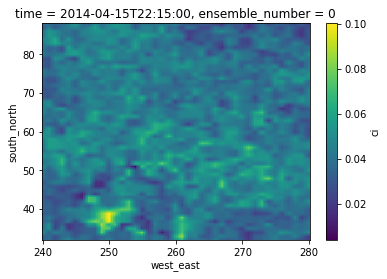

In [8]:
f = '20140415_2215Z.nc'
f_crs = '20140415_2215Z_crs.nc'
res_ds = xr.open_dataset(f)
res_ci = res_ds.data_vars['ci']
res0 = res_ci[0,0,:,:]
res0.plot()
plt.show()
res_ds.close()

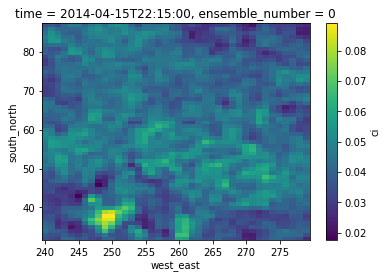

In [10]:
res_ci = xr.open_dataarray(f_crs)
res0 = res_ci[0,0,:,:]
res0.plot()
plt.show()
res_ds.close()

In [3]:
'abc' in 'asdfabcdd'

True